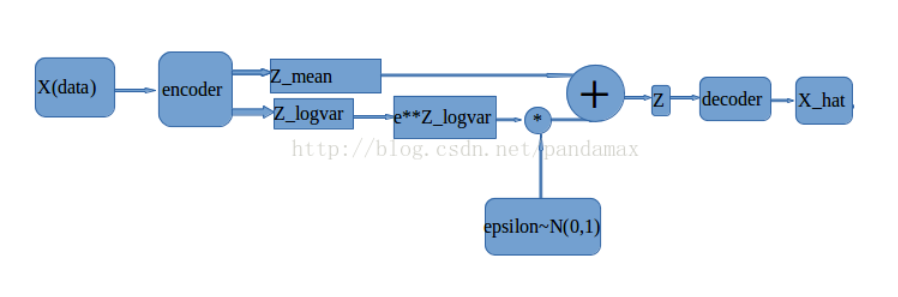

In [1]:
import tensorflow as tf

class VariationalAutoencoder(object):

    def __init__(self, n_input, n_hidden, optimizer = tf.train.AdamOptimizer()):
        self.n_input = n_input
        self.n_hidden = n_hidden

        network_weights = self._initialize_weights()
        self.weights = network_weights

        # model
        self.x = tf.placeholder(tf.float32, [None, self.n_input])
        self.z_mean = tf.add(tf.matmul(self.x, self.weights['w1']), self.weights['b1'])
        self.z_log_sigma_sq = tf.add(tf.matmul(self.x, self.weights['log_sigma_w1']), self.weights['log_sigma_b1'])

        # sample from gaussian distribution
        eps = tf.random_normal(tf.stack([tf.shape(self.x)[0], self.n_hidden]), 0, 1, dtype = tf.float32)
        self.z = tf.add(self.z_mean, tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        self.reconstruction = tf.add(tf.matmul(self.z, self.weights['w2']), self.weights['b2'])

        # cost
        reconstr_loss = 0.5 * tf.reduce_sum(tf.pow(tf.subtract(self.reconstruction, self.x), 2.0))
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq
                                           - tf.square(self.z_mean)
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)
        self.optimizer = optimizer.minimize(self.cost)

        init = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init)

    def _initialize_weights(self):
        all_weights = dict()
        all_weights['w1'] = tf.get_variable("w1", shape=[self.n_input, self.n_hidden],
            initializer=tf.contrib.layers.xavier_initializer())
        all_weights['log_sigma_w1'] = tf.get_variable("log_sigma_w1", shape=[self.n_input, self.n_hidden],
            initializer=tf.contrib.layers.xavier_initializer())
        all_weights['b1'] = tf.Variable(tf.zeros([self.n_hidden], dtype=tf.float32))
        all_weights['log_sigma_b1'] = tf.Variable(tf.zeros([self.n_hidden], dtype=tf.float32))
        all_weights['w2'] = tf.Variable(tf.zeros([self.n_hidden, self.n_input], dtype=tf.float32))
        all_weights['b2'] = tf.Variable(tf.zeros([self.n_input], dtype=tf.float32))
        return all_weights

    def partial_fit(self, X):
        cost, opt = self.sess.run((self.cost, self.optimizer), feed_dict={self.x: X})
        return cost

    def calc_total_cost(self, X):
        return self.sess.run(self.cost, feed_dict = {self.x: X})

    def transform(self, X):
        return self.sess.run(self.z_mean, feed_dict={self.x: X})

    def generate(self, hidden = None):
        if hidden is None:
            hidden = self.sess.run(tf.random_normal([1, self.n_hidden]))
        return self.sess.run(self.reconstruction, feed_dict={self.z: hidden})

    def reconstruct(self, X):
        return self.sess.run(self.reconstruction, feed_dict={self.x: X})

    def getWeights(self):
        return self.sess.run(self.weights['w1'])

    def getBiases(self):
        return self.sess.run(self.weights['b1'])


D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


AttributeError: module 'tensorflow_core._api.v2.train' has no attribute 'AdamOptimizer'